In [88]:
import os
import sys
import importlib

import pandas as pd
import uproot as up
import numpy as np
import time

import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

from pathlib import Path
import os.path
import csv
import pyroot as pr

from matplotlib import pyplot as plt
from math import cos, cosh, radians
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator

import awkward as ak

# DataFrame Construction

In [89]:
parsed_events = []
print("reading dataset")
#for file in os.listdir(r"./PrivateSignal16_test/MH1000_Ma100_MChi45"):
for file in os.listdir(r"D:\taisd\Documentos\UERJ\IC\Higgs-to-tautau\dataset\dataset"):
    print(file)
    try:
        #dataset = up.open(os.path.join(r"./PrivateSignal16_test/MH1000_Ma100_MChi45", file))
        dataset = up.open(os.path.join(r"D:\taisd\Documentos\UERJ\IC\Higgs-to-tautau\dataset\dataset", file))
        tree = dataset.get("Events;1")
        #abaixo com menos branches 
        objects = ["Tau_idDeepTau2017v2p1VSjet"]
        events = tree.arrays(objects)

        for event in events:
            event = {k: getattr(event, k) for k in objects}
            parsed_events.append(event)

    except:
        print("fail")
        break
print("done")

datasets = parsed_events

reading dataset
1F343B3A-A003-9D42-956A-63D0E972E3E9.root
2FCFCFB1-696A-E84E-98B3-5FE5D2445345.root
42DAD507-A3E8-DC4D-96F4-D85B9607935C.root
55DF9C9F-05E5-8842-BF5E-CE86BCFC8882.root
8729905A-86FF-814A-B31C-6713A78BB76A.root
8CD9F2FC-76B7-E844-82EF-6B509F8C1A04.root
EBB395DE-4617-B843-95CA-FEFB86253D89.root
F38DB76E-F009-A84F-A958-368C6E212E9A.root
done


In [90]:
df = pd.DataFrame(datasets)
print(len(df))

246000


In [91]:
df

,Tau_idDeepTau2017v2p1VSjet
0,[255]
1,[]
2,"[255, 255]"
3,"[255, 255]"
4,[]
...,...
245995,"[3, 7]"
245996,"[255, 255, 1]"
245997,"[255, 255]"
245998,[7]


In [92]:
data = ak.flatten(df['Tau_idDeepTau2017v2p1VSjet'])
print(data)

[255, 255, 255, 255, 255, 255, 255, 255, ..., 255, 255, 1, 255, 255, 7, 255, 63]


In [93]:
working_points = set(data)
working_points

{0, 1, 3, 7, 15, 31, 63, 127, 255}

In [94]:
df['Tau_idDeepTau2017v2p1VSjet']

0                 [255]
1                    []
2            [255, 255]
3            [255, 255]
4                    []
              ...      
245995           [3, 7]
245996    [255, 255, 1]
245997       [255, 255]
245998              [7]
245999        [255, 63]
Name: Tau_idDeepTau2017v2p1VSjet, Length: 246000, dtype: object

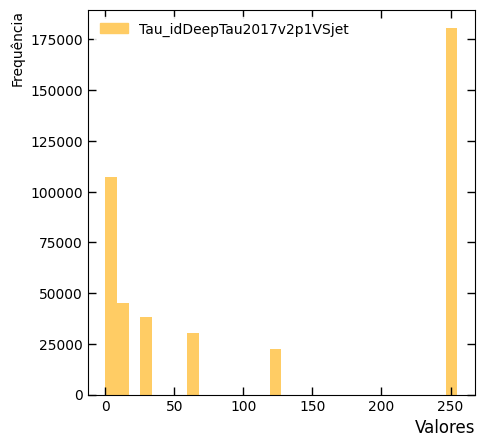

In [97]:
plt.figure(figsize=(5,5))
n, bins, patches = plt.hist(data, 30, color="#ffcc64")  # 15 para os múons e 30 para elétrons e jets

plt.xlabel('Valores', loc="right", fontsize = 'large')
plt.ylabel('Frequência', loc="top")


yellow_patch = mpatches.Patch(color='#ffcc64', label='Tau_idDeepTau2017v2p1VSjet')
plt.legend(handles=[yellow_patch], edgecolor='white', title_fontsize='xx-small')


plt.tick_params(axis='both', bottom=True, top=True, left=True, right=True,
                direction='in', length=6, width=1, colors='black')
plt.tick_params(axis='both', which='minor', direction='in', length=3, width=1, colors='black', top=True, right=True)




plt.show()